In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import random
from IPython.display import IFrame

In [2]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

## importing song database

In [4]:
df = pd.read_csv("library.csv")
df

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6ziqWx82jgkQYhyIALoraH,0.711,0.838,2,-7.985,1,0.0423,0.29200,0.927000,0.1460,0.2230,124.002,224274,4
1,62piGIpUTsY8HA7tdjfLS8,0.746,0.749,11,-10.482,0,0.0454,0.00567,0.366000,0.2280,0.0342,123.988,178064,4
2,2QlUkqLbDDxDpiMcW7OJrZ,0.544,0.872,5,-7.444,0,0.0339,0.00794,0.877000,0.1180,0.1820,123.033,265366,4
3,77FpsyFq4vGchrHovA8EyU,0.753,0.915,4,-8.609,0,0.0396,0.00104,0.883000,0.0608,0.1040,120.008,233662,4
4,3YDBOFmBEk19AS4t4gwpXq,0.685,0.810,2,-8.179,1,0.0366,0.00020,0.899000,0.0900,0.0869,123.994,435322,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,5FvxRvrQ8qzKjBJ6ST9aiu,0.436,0.948,1,-5.515,0,0.0558,0.09740,0.003750,0.1400,0.6960,122.609,199136,4
3014,2giNwwft9s8E5Or8N0olgc,0.635,0.167,9,-21.117,0,0.6650,0.89300,0.000000,0.5010,0.7120,100.544,147694,3
3015,6Lgbf4b6c9fwz24eFEWONX,0.665,0.712,6,-6.841,0,0.0397,0.00115,0.000187,0.2700,0.4890,105.017,279318,4
3016,53XrsilgguJmmsEtDsj0yY,0.535,0.382,1,-18.760,1,0.6450,0.85200,0.000000,0.3110,0.6090,86.969,148073,4


# functions - scaling & clustering

In [5]:
def standard_scaling_transform(DataFrame: pd.DataFrame) -> pd.DataFrame: 
    """takes a DataFrame as an input, transforms the data and returns a standardscaled DataFrame"""
    numeric_columns = DataFrame.select_dtypes(include=np.number).columns
    DataFrame[numeric_columns] = scaler.transform(DataFrame[numeric_columns])
    return DataFrame

In [6]:
def cluster_predict(DataFrame: pd.DataFrame) -> np.ndarray:
    """takes a DataFrame as an input, predicts the numeric columns and returns the clusters"""
    return kmeans.predict(DataFrame[DataFrame.select_dtypes(include=np.number).columns])

## scaling

In [7]:
numeric_columns = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
scaled_df = df

## finding the best amount of clusters (K)

## Elbow Method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

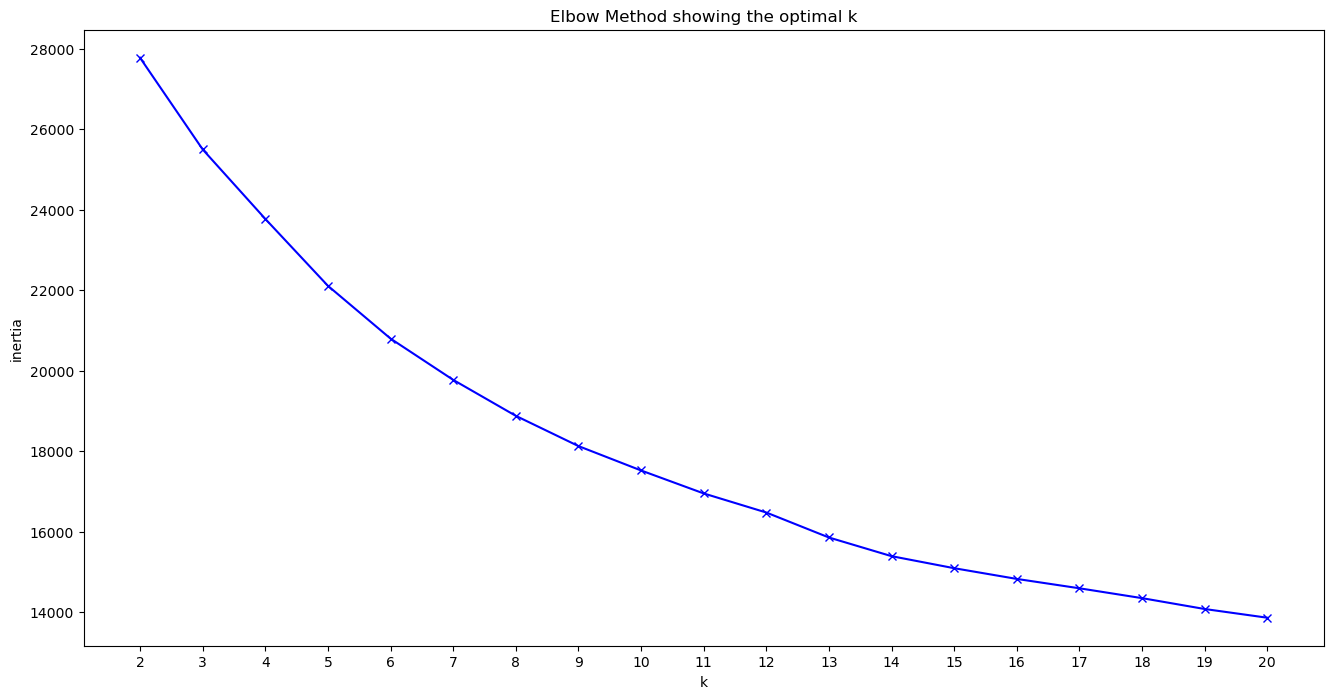

In [8]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans3 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans3.fit(df[df.select_dtypes(include=np.number).columns])
    inertia.append(kmeans3.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

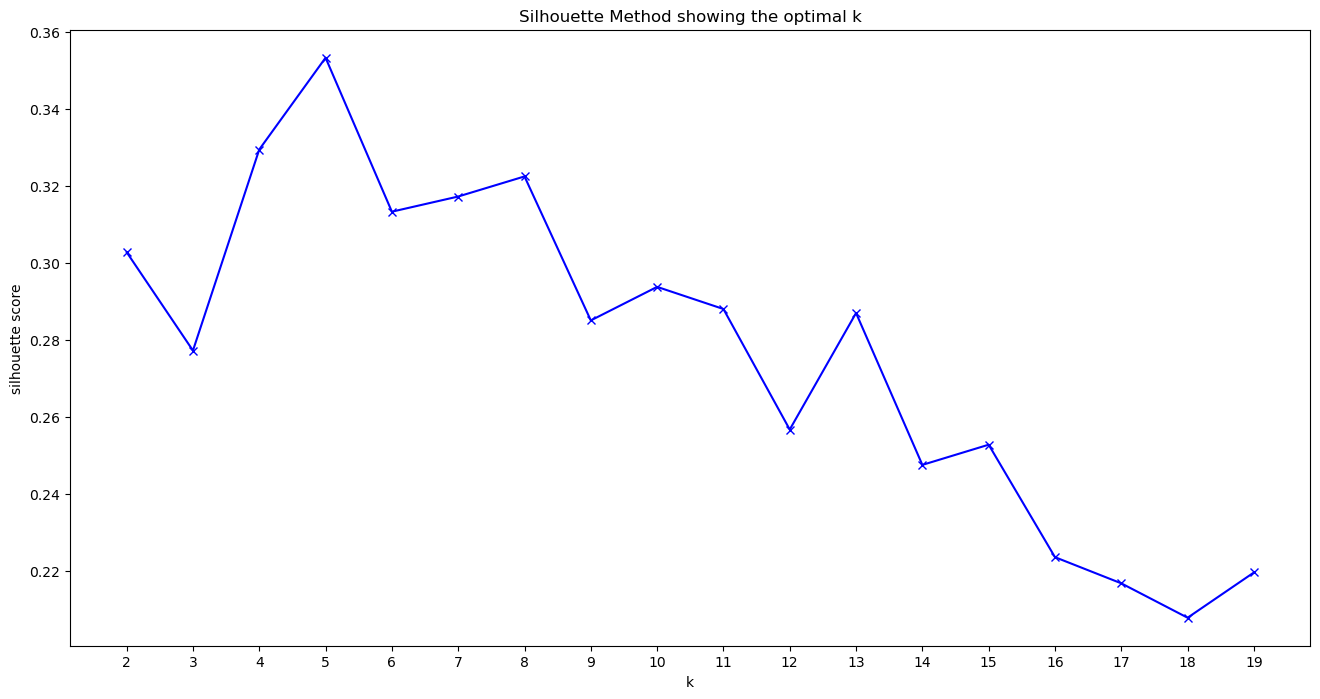

In [40]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans4 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans4.fit(df[df.select_dtypes(include=np.number).columns])
    
    filename = "model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans4,f)
    
    silhouette.append(silhouette_score(df[df.select_dtypes(include=np.number).columns], kmeans4.predict(df[df.select_dtypes(include=np.number).columns])))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#### adjust the number of clusters in n_clusters

In [10]:
kmeans = KMeans(n_clusters=13, random_state=1234)

## fit and predict clusters

In [11]:
kmeans.fit(scaled_df[scaled_df.select_dtypes(include=np.number).columns])

KMeans(n_clusters=13, random_state=1234)

In [12]:
labels = cluster_predict(scaled_df)

In [13]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [14]:
# clusters overview
pd.Series(labels).value_counts().sort_index()

0     212
1     301
2     229
3     408
4     364
5     354
6     236
7     282
8     145
9      28
10    247
11    127
12     85
dtype: int64

## adding cluster column to the database DataFrame

In [15]:
df["cluster"] = labels
pd.options.display.max_columns = 5 # reducing number of visible columns to see cluster column right away
df

,id,danceability,...,time_signature,cluster
0,6ziqWx82jgkQYhyIALoraH,0.555282,...,0.240315,5
1,62piGIpUTsY8HA7tdjfLS8,0.769612,...,0.240315,7
2,2QlUkqLbDDxDpiMcW7OJrZ,-0.467379,...,0.240315,1
3,77FpsyFq4vGchrHovA8EyU,0.812478,...,0.240315,1
4,3YDBOFmBEk19AS4t4gwpXq,0.396065,...,0.240315,12
...,...,...,...,...,...
3013,5FvxRvrQ8qzKjBJ6ST9aiu,-1.128740,...,0.240315,1
3014,2giNwwft9s8E5Or8N0olgc,0.089879,...,-2.235012,6
3015,6Lgbf4b6c9fwz24eFEWONX,0.273591,...,0.240315,1
3016,53XrsilgguJmmsEtDsj0yY,-0.522492,...,0.240315,6


In [16]:
#setting number of columns back to 20
pd.options.display.max_columns = 20 

## importing Top100 list

In [17]:
# import top100 DataFrame
df100 = pd.read_csv('top100.csv')
df100

,title,artist
0,Flowers,Miley Cyrus
1,Kill Bill,SZA
2,Last Night,Morgan Wallen
3,Unholy,Sam Smith & Kim Petras
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,Yandel 150,Yandel & Feid
96,Heart To Heart,Mac DeMarco
97,Next Thing You Know,Jordan Davis
98,Never Gonna Not Dance Again,P!nk


### input functions

In [18]:
def title_input() -> str:
    return input(f'Please put in a song title:\n\n')
        

In [19]:
def artist_input() -> str:
    return input(f'Please put in an artist:\n\n')
        

In [20]:
def yes_no() -> str:
    return input(f'\nWould you like to try another one? Yes / No\n\n')

### filtering if user_input is in Top100 or not

In [21]:
def check_title(df100: pd.DataFrame, song_input: str) -> bool:
    
    # creating list of songs
    list_of_songs = list(df100['title'])
    lower_list = [x.lower() for x in list_of_songs]
    
    while True:
        title = song_input
        
        # not in top100
        if (title.lower() not in lower_list):
            return False
        
        # in top100
        else:
            return True

In [22]:
def check_artist(df100: pd.DataFrame,artist_input: str,song_input: str) -> bool:
            # creating list of artists
            df_mod = df100
            df_mod['title'] = df_mod['title'].str.lower()
            options = df_mod.loc[(df_mod['title'] == song_input.lower()),['artist']]
            artist_list = options['artist'].tolist()
            lower_artists = [x.lower() for x in artist_list]
            
            # in top100
            if (artist_input.lower() in lower_artists):
                return True
            else:
                return False

### finding the  track_id for title and artist combination

In [23]:
def find_track_id(title:str, artist:str) -> str:
    search_results = sp.search(q=(f'{artist}{title}'), limit=1,market="GB")
    track_id = search_results["tracks"]["items"][0]["id"]
    return track_id

### fetching audio features from a track_id and creating a dataframe

In [24]:
def audio_features(track_id: str) -> list:
    return sp.audio_features(track_id)

In [25]:
def features_df(audio_features: list) -> pd.DataFrame:
    return pd.DataFrame(data=audio_features)

### recommending another Top100 song

In [26]:
def next_100(df100: pd.DataFrame) -> tuple:
    #extract title
    random_100_song_title = random.sample(list(df100['title']),k=1)
    random_100_song_title = random_100_song_title[0]
    #extract artist
    options = df100.loc[(df100['title'] == random_100_song_title,['artist'])]
    artist_output = options['artist'].tolist()
    artist_output= artist_output[0]
    return random_100_song_title,artist_output

### recommending a random track_id from the same cluster as the user_input cluster

In [27]:
def random_rec(library_df: pd.DataFrame ,cluster_number: np.ndarray) -> str:
    cluster_value = cluster_number[0]
    target_cluster = library_df.loc[(library_df['cluster'] == cluster_value),['id']]

    track_id_list = target_cluster['id'].tolist()
    return random.choice(track_id_list)

### play and display functions

In [28]:
def play_song(track_id: str): # returns a displayable IFrame to play a song 
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [29]:
def display_song(title:str,artist:str): # displays IFrame
    return display(play_song(find_track_id(title,artist)))

In [30]:
def user_song(song:str,artist:str): # displays an IFrame or yes / no as str
    try:
        display(play_song(find_track_id(song,artist)))
        return True
    except:
        print(f"Couldn't find your choice on Spotify.")
        return False

In [31]:
def display_recommended_song(song:str,artist:str) -> np.ndarray:
    print(f'\nYou will now get a recommendation of the database that is similar to your choice:')
    user_song_cluster = cluster_predict(standard_scaling_transform(features_df(audio_features(find_track_id(song,artist)))))
    display(play_song(random_rec(df,user_song_cluster)))

### restart option feature

In [32]:
def yesno(choice:str) -> str:
    yn=choice.lower()
    confirm = ['yes','y','j','ja','+',
               'no','n','nein','ne','nope','-','bye','ciao','end','stop']
    if yn in confirm:
        if yn in ('yes','y','j','+'):
            return 'yes'
        else:
            return 'no'
    else:
        return False

In [33]:
def decider_restart():#no input no output
    answer = yesno(yes_no())
    
    while answer not in ('yes','no'):
        answer = yesno(yes_no())
    if answer == 'yes':
        #restart
        song_recommender()
    else:
        #stop
        print(f'\nThank you. See you next time :)')
    

In [34]:
def display_handler(song:str,artist:str):
    print('-'*52)
    print(f'\nYou chose "{song}" from "{artist}"')
    # display user song and handle error if displaying didn't work
    if user_song(song,artist) == True:    

    # display song recommendation
        display_recommended_song(song,artist)
        decider_restart()
        
        #didn't work
    else:
        # go again?
        decider_restart()

# finished song recommender

In [35]:
def song_recommender():
    song = title_input()
    result = check_title(df100,song)
    
    # title in Top100
    if result == True:
        print(f'\nYour song might be in the Top100.\n')
        artist = artist_input()
        
        # title and artist in Top100
        if check_artist(df100,artist,song) == True:
            
            # display user song
            print(f'\nYour Song "{song.title()}" from artist "{artist.title()}" is in the Top100 :')
            user_song(song,artist)
            
            #display different Top100 song
            print(f'\nYou will now get a recommendation of another song out of the Top100:')
            title_100,artist_100 = next_100(df100)
            display_song(title_100,artist_100)
            
            decider_restart()
            
        # title in Top100 but artist is not
        else:
            print(f'\nYour combination of song title "{song.title()}" and artist "{artist.title()}" is not in the Top 100.')
            
            # display user song and handle error if displaying didn't work
            display_handler(song,artist)
    
    #title not in Top100        
    else:
        print(f"\n'{song.title()}' is not in the Top100.\n")
        artist = artist_input()
               
        # display user song and handle error if displaying didn't work
        display_handler(song,artist)
        
        

In [36]:
pd.options.display.max_rows = 100 # increasing visible rows so you can pick a song from the Top100 if you want to
df100

,title,artist
0,Flowers,Miley Cyrus
1,Kill Bill,SZA
2,Last Night,Morgan Wallen
3,Unholy,Sam Smith & Kim Petras
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
5,Cuff It,Beyonce
6,Anti-Hero,Taylor Swift
7,Die For You,The Weeknd
8,I'm Good (Blue),David Guetta & Bebe Rexha
9,As It Was,Harry Styles


## Have fun :)

In [40]:
song_recommender()

Please put in a song title:

flowers

Your song might be in the Top100.

Please put in an artist:

john

Your combination of song title "Flowers" and artist "John" is not in the Top 100.
----------------------------------------------------

You chose "flowers" from "john"



You will now get a recommendation of the database that is similar to your choice:



Would you like to try another one? Yes / No

zjzjgzzjtz

Would you like to try another one? Yes / No

,iii,

Would you like to try another one? Yes / No

-

Thank you. See you next time :)


In [ ]:
pd.options.display.max_rows = 20 # decreasing visible rows back to normal